摘自Medium [Mobile Image Blur Detection](https://medium.com/snapaddy-tech-blog/mobile-image-blur-detection-with-machine-learning-c0b703eab7de)

In [4]:
import numpy as np 
from scipy import ndimage
from scipy.ndimage import variance
from scipy.ndimage import mean
from skimage import io
from skimage.color import rgb2gray
from skimage.filters import laplace, sobel
from skimage.transform import resize
from matplotlib.pyplot import plot as plot

mean: 2.68541187766e-05, var: 0.00110288649189, max:0.779604576827


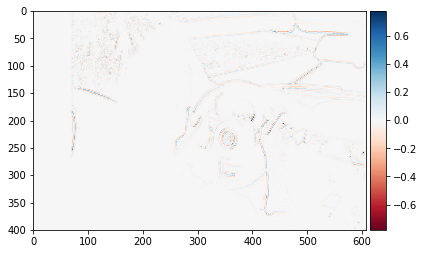

In [14]:
path = "data\\black_ (12).jpg"
img = io.imread(path)
# print (img).shape, np.amax(img), np.amin(img)
# Resize image
img = resize(img, (400, int((img.shape[1] * 400) /img.shape[0])))
# print img.shape

# Grayscale image
img = rgb2gray(img)
# Edge detection
edge_laplace = laplace(img, ksize=3)
# edge_laplace = sobel(img)
print ('mean: {}, var: {}, max:{}'.format(mean(edge_laplace),variance(edge_laplace),np.amax(edge_laplace)))
io.imshow(edge_laplace)

In [22]:
import cv2
image = cv2.imread('data\\black_ (12).jpg')
image = cv2.resize(image, (400, int((image.shape[1] * 400) /image.shape[0])), interpolation=cv2.INTER_CUBIC)
img2gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
imageLaplace = cv2.Laplacian(img2gray,cv2.CV_64F)
# print dir(imageLaplace)
imageVar = imageLaplace.var()
imageMean = imageLaplace.mean()
imageMax = imageLaplace.max()
imageGrad = cv2.Laplacian(img2gray,cv2.CV_16U,1,1)
imageGrad = np.mean(imageGrad)
print ('mean1: {}, mean2: {}, var: {}, max:{}'.format(imageGrad, imageMean, imageVar, imageMax))

mean1: 2.21481496711, mean2: 0.00327713815789, var: 150.994935806, max:186.0


In [148]:
# Print output
lbl, nlbl = ndimage.label(edge_laplace)
print ('Variance_not0: {}'.format(ndimage.variance(edge_laplace, lbl)))
print("Variance: {}".format(variance(edge_laplace)))
print("mean: {}".format(mean(edge_laplace)))
print("Maximum : {}".format(np.amax(edge_laplace)))

Variance_not0: 0.00120596074196
Variance: 0.00121039644916
mean: 0.041516018687
Maximum : 0.340822316062


In [ ]:
def getAllFiles(folder):
    rtn = list()
    for img_dir, _, img_names in os.walk(folder):
        for img_name in img_names:
            rtn.append(os.path.join(img_dir, img_name))
    return rtn

In [33]:
import os
blur_path = "data\\sharpness\\black_ (%i).jpg"
sharp_path = "data\\sharpness\\sharp_ (%i).jpg"
xs_blur, ys_blur= list(), list()
xs_sharp, ys_sharp= list(), list()
for i in range(1, 8):
    img_blur_path = blur_path%i
    img_blur = io.imread(img_blur_path)
    
    img_blur = resize(img_blur, (400, int((img_blur.shape[1] * 400) /img_blur.shape[0])))
    img_blur = rgb2gray(img_blur)
    edge_laplace_blur = laplace(img_blur, ksize=11)
#     edge_laplace_blur = sobel(img_blur)
    
    x_blur = mean(edge_laplace_blur)
    x_blur = variance(edge_laplace_blur)
#     lbl, nlbl = ndimage.label(edge_laplace_blur)
#     x_blur = ndimage.variance(edge_laplace_blur, lbl)
    y_blur = np.amax(edge_laplace_blur)
    
    image = cv2.imread(img_blur_path)
    image = cv2.resize(image, (400, int((image.shape[1] * 400) /image.shape[0])), interpolation=cv2.INTER_CUBIC)
    image = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)
    img2gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    imageLaplace = cv2.Laplacian(img2gray,cv2.CV_64F)
    # print dir(imageLaplace)
#     x_blur = imageLaplace.var()
    imageMean = imageLaplace.mean()
#     y_blur = imageLaplace.max()

    print ('blur: {}, mean: {}, var: {}, max: {}'.format(os.path.basename(img_blur_path),mean(edge_laplace_blur), x_blur, y_blur))

    xs_blur.append(x_blur)
    ys_blur.append(y_blur)

for i in range(1, 6):
    img_sharp_path = sharp_path%i
    img_sharp = io.imread(img_sharp_path)
    img_sharp = resize(img_sharp, (400, int((img_sharp.shape[1] * 400) /img_sharp.shape[0])))
    image = cv2.resize(image, (400, 400), interpolation=cv2.INTER_CUBIC)
    img_sharp = rgb2gray(img_sharp)
    edge_laplace_sharp = laplace(img_sharp, ksize=11)
#     edge_laplace_sharp = sobel(img_sharp)
    
    x_sharp = mean(edge_laplace_sharp)
    x_sharp = variance(edge_laplace_sharp)
#     lbl, nlbl = ndimage.label(edge_laplace_sharp)
#     x_sharp = ndimage.variance(edge_laplace_sharp, lbl)
    y_sharp = np.amax(edge_laplace_sharp)
    
    image = cv2.imread(img_sharp_path)
    image = cv2.resize(image, (400, int((image.shape[1] * 400) /image.shape[0])), interpolation=cv2.INTER_CUBIC)
    img2gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    imageLaplace = cv2.Laplacian(img2gray,cv2.CV_64F)
    # print dir(imageLaplace)
#     x_sharp = imageLaplace.var()
    imageMean = imageLaplace.mean()
#     y_sharp = imageLaplace.max()
    
    print ('sharp: {}, mean: {}, var: {}, max: {}'.format(os.path.basename(img_sharp_path),mean(edge_laplace_sharp), x_sharp, y_sharp))

    xs_sharp.append(x_sharp)
    ys_sharp.append(y_sharp)
    



blur: black_ (1).jpg, mean: 0.000115562478952, var: 0.0022450832776, max: 1.38898079215
blur: black_ (2).jpg, mean: 7.43210226579e-06, var: 0.000523823167547, max: 0.592077972549
blur: black_ (3).jpg, mean: 8.18479215092e-05, var: 0.00745558884558, max: 1.62829300268
blur: black_ (4).jpg, mean: -3.66085770283e-05, var: 0.000582908210114, max: 1.03297814727
blur: black_ (5).jpg, mean: 0.000291141654209, var: 0.00814134158176, max: 1.96324869408
blur: black_ (6).jpg, mean: -1.10117513726e-06, var: 0.00209493161865, max: 1.84107643922
blur: black_ (7).jpg, mean: -6.76061991317e-06, var: 0.000314381307434, max: 0.257141733819
sharp: sharp_ (1).jpg, mean: 0.000244943372079, var: 0.00763664040422, max: 1.65069836222
sharp: sharp_ (2).jpg, mean: -2.10359524113e-05, var: 0.0148530888516, max: 1.97355059027
sharp: sharp_ (3).jpg, mean: 0.000836173597431, var: 0.000247200952208, max: 0.308982363895
sharp: sharp_ (4).jpg, mean: -8.41088536819e-05, var: 0.0217804215896, max: 2.04200976471
sharp: s

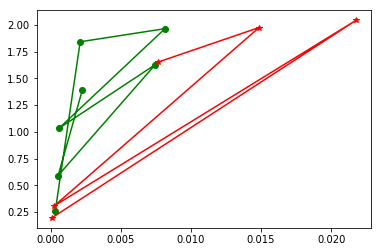

In [34]:
plot(xs_blur, ys_blur, color='green', marker='o')
plot(xs_sharp, ys_sharp, color='red', marker='*')
